In [84]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset from a CSV file
df = pd.read_csv("/content/laptop.csv")

In [85]:
# Shape of the dataset
df.shape

(1303, 13)

In [86]:
# Displaying the data types of each column in the DataFrame
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0          float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [87]:
# Basic summary of the DataFrame to understand the structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [88]:
# Display the first few rows of the DataFrame to verify that the data has been loaded correctly
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [89]:
# count of the null values in each column
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

<Axes: >

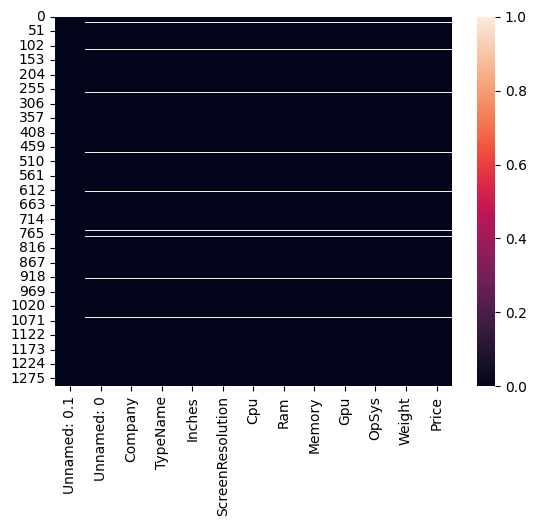

In [90]:
# null values in Graph
import seaborn as sns
sns.heatmap(df.isnull())

In [91]:
# removing the null rows and checking the count of null values again
df=df.dropna()
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<Axes: >

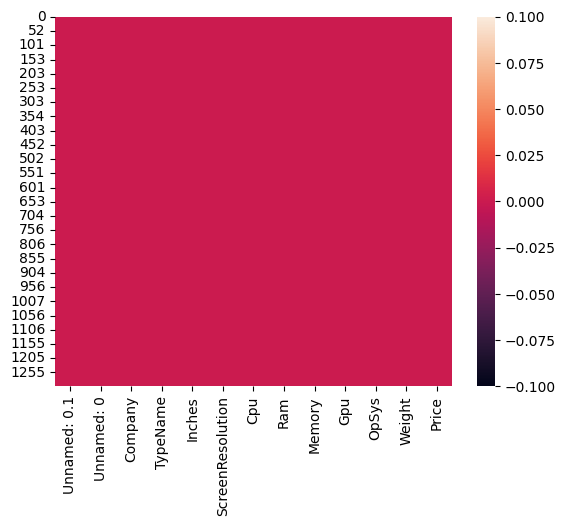

In [92]:
import seaborn as sns
sns.heatmap(df.isnull())

In [93]:
# Dropping unnecessary columns from the DataFrame
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],axis=1,inplace=True)
# Displaying the shape of the DataFrame
df.shape

(1273, 11)

In [94]:
# Stripping whitespace from string columns in the DataFrame

df["Company"]=df["Company"].str.strip()
df["TypeName"]=df["TypeName"].str.strip()
df["Inches"]=df["Inches"].str.strip()
df["ScreenResolution"]=df["ScreenResolution"].str.strip()
df["Cpu"]=df["Cpu"].str.strip()
df["Ram"]=df["Ram"].str.strip()
df["Memory"]=df["Memory"].str.strip()
df["Gpu"]=df["Gpu"].str.strip()
df["Weight"]=df["Weight"].str.strip()


In [95]:
# Extracting pixel resolution information from the 'ScreenResolution' column
df["Pixels"]=df["ScreenResolution"].str.extract(r'(\d+x\d+)')

# Displaying the first few rows of the DataFrame to verify the extraction
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Pixels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600


In [96]:
# Creating a new column 'Touchscreen' to indicate whether a laptop has a touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [97]:
# Creating a new column 'Ips' to indicate whether a laptop has a touchscreen
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [98]:
# Replacing the 'x' character with a space in the 'Pixels' column
df["Pixels"]=df["Pixels"].str.replace("x"," ")

# Splitting the 'Pixels' column into 'Length' and 'Breadth' columns
df["Length"]=df["Pixels"].str.split().str[0].astype(int)
df["Breadth"]=df["Pixels"].str.split().str[1].astype(int)

In [99]:
# Replacing any '?' characters in the 'Inches' column with the mode of the column and Converting it to float type
df["Inches"]=df["Inches"].replace("?",df["Inches"].mode()[0]).astype(float)

In [100]:
# Calculating the Pixel Per Inch (PPI) for each laptop
df["PPI"]=round((np.sqrt(df["Length"]**2+df["Breadth"]**2))/df["Inches"],2)

# Displaying the last few rows of the DataFrame to verify the calculations
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Pixels,Touchscreen,Ips,Length,Breadth,PPI
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64,1920 1080,1,1,1920,1080,157.35
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72,3200 1800,1,1,3200,1800,276.05
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12,1366 768,0,0,1366,768,111.94
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92,1366 768,0,0,1366,768,100.45
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32,1366 768,0,0,1366,768,100.45


In [101]:
# Counting the occurrences of each unique value in the 'Cpu' column
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [102]:
# Extracting the first three words from the 'Cpu' column to create a new 'Cpu_Processor' column
df["Cpu_Processor"] = df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

# Counting the occurrences of each unique value in the 'Cpu_Processor' column
df["Cpu_Processor"].value_counts()

Cpu_Processor
Intel Core i7               515
Intel Core i5               410
Intel Core i3               134
Intel Celeron Dual           79
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
AMD A8-Series 7410            4
Intel Atom x5-Z8350           4
AMD Ryzen 1700                3
Intel Atom x5-Z8550           3
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
Intel Atom X5-Z8350           2
AMD A6-Series A6-9220         2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD E-Series 7110             2
AMD E-Series E2-9000e         2
AMD A10-Series 9600P          2
AMD Ryzen 1600                1
AMD E-Series E2-6110          1
Intel Atom x5-Z8300           1
AMD E-Series 9000e            1
AMD A6-Series 7310        

In [103]:
# Filtering the DataFrame to exclude rows where 'Cpu_Processor' is 'Samsung Cortex A72&A53'
df = df[df["Cpu_Processor"] != "Samsung Cortex A72&A53"]

In [104]:
# Displaying the counts of each unique CPU processor type
df["Cpu_Processor"].value_counts()

Cpu_Processor
Intel Core i7               515
Intel Core i5               410
Intel Core i3               134
Intel Celeron Dual           79
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           4
AMD A8-Series 7410            4
AMD A9-Series 9410            3
Intel Atom x5-Z8550           3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD E-Series E2-9000e         2
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD E-Series 7110             2
Intel Xeon E3-1505M           2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
AMD A12-Series 9700P          1
AMD E-Series 9000             1
AMD E-Series 9000e            1
AMD FX 8800P              

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
# Defining a function to categorize CPU processors
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

# Applying the 'processor' function to the 'Cpu_Processor' column
df["Cpu_Processor"] = df["Cpu_Processor"].apply(processor)

# Displaying the counts of each unique CPU processor type
df["Cpu_Processor"].value_counts()

Cpu_Processor
Intel Core i7            515
Intel Core i5            410
Other Intel Processor    151
Intel Core i3            134
AMD Processor             62
Name: count, dtype: int64

In [107]:
# Extracting CPU frequency in GHz from the 'Cpu' column
df["CpuFrequencyGHz"]=df["Cpu"].str.extract(r'(\d+(?:\.\d+)?)GHz')

In [108]:
# Replacing the 'GHz' suffix from the 'CpuFrequencyGHz' column with space
df["CpuFrequencyGHz"]=df["CpuFrequencyGHz"].str.replace("GHz","")

# Converting the 'CpuFrequencyGHz' column to float type
df["CpuFrequencyGHz"]=df["CpuFrequencyGHz"].astype(float)

# Displaying the unique values in the 'CpuFrequencyGHz' column
df["CpuFrequencyGHz"].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.5 , 1.9 , 1.44, 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [109]:
# Extracting the GPU manufacturer from the 'Gpu' column
df["GpuManufacturer"] = df["Gpu"].str.split(" ",n=1).str[0]

# Displaying the counts of each GPU manufacturer
df["GpuManufacturer"].value_counts()

GpuManufacturer
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

In [110]:
# Extracting storage device type from the 'Memory' column and creating a new column 'StorageDevice'
df["StorageDevice"] = df["Memory"].str.extract(r"(HDD|SSD|Flash Storage|Hybrid)\b")

In [111]:
# Splitting the 'Memory' column values by whitespace and extracting the first part
df["Memory"] = df["Memory"].str.split().str[0]

# Displaying the unique values in the 'Memory' column
df["Memory"].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '64GB', '32GB', '2TB',
       '1.0TB', '16GB', '180GB', '?', '240GB', '8GB', '508GB'],
      dtype=object)

In [112]:
# Replacing missing or placeholder values ('?') in the 'Memory' column with the mode
df["Memory"]=df["Memory"].replace("?",df["Memory"].mode()[0])

# Displaying the unique values in the 'Memory' column
df["Memory"].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '64GB', '32GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

Laptop Company

In [113]:
# Counting the number of occurrences of each unique value in the 'Company' column
df["Company"].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [114]:
# Defining a function to categorize Laptop Company
def CompanyNames(name):
    valid_names = {"Lenovo", "Dell", "HP", "Asus", "Acer", "Apple", "MSI", "Razer"}
    if name not in valid_names:
        return "Others"
    else:
        return name

# Apply the function to the Company column
df["CompanyName"] = df["Company"].apply(CompanyNames)

# Counting the number of occurrences of each unique value in the 'Company' column
df["CompanyName"].value_counts()

CompanyName
Lenovo    290
Dell      287
HP        266
Asus      156
Acer      103
Others     89
MSI        53
Apple      21
Razer       7
Name: count, dtype: int64

Type of Laptop

In [115]:
# Renaming the 'TypeName' column with 'Laptop Type'
df = df.rename(columns={'TypeName': 'Laptop_Type'})

# Counting the number of occurrences of each unique value in the 'Company' column
df["Laptop_Type"].value_counts()

Laptop_Type
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    115
Workstation            29
Netbook                24
Name: count, dtype: int64

OpSystem in Laptop

In [116]:
# Counting the number of occurrences of each unique value in the 'OpSys' column
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [117]:
# Defining a function to categorize OpSys column
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['OpSys'] = df['OpSys'].apply(cat_os)

# Counting the number of occurrences of each unique value in the 'OpSys' column
df["OpSys"].value_counts()

OpSys
Windows               1100
Others/No OS/Linux     151
Mac                     21
Name: count, dtype: int64

Weight of Laptop

In [118]:
# Replacing "kg" with space
df["WeightKg"]=df["Weight"].str.replace("kg"," ")

# Displaying the Unique Values
df["WeightKg"].unique()

array(['1.37 ', '1.34 ', '1.86 ', '1.83 ', '2.1 ', '2.04 ', '1.3 ',
       '1.6 ', '2.2 ', '0.92 ', '1.22 ', '2.5 ', '1.62 ', '1.91 ', '2.3 ',
       '1.35 ', '1.88 ', '1.89 ', '1.65 ', '2.71 ', '1.2 ', '1.44 ',
       '2.8 ', '2 ', '2.65 ', '2.77 ', '3.2 ', '1.49 ', '2.4 ', '2.13 ',
       '2.43 ', '1.7 ', '1.4 ', '1.8 ', '1.9 ', '3 ', '1.252 ', '2.7 ',
       '2.02 ', '1.63 ', '1.96 ', '1.21 ', '2.45 ', '1.25 ', '1.5 ',
       '2.62 ', '1.38 ', '1.58 ', '1.85 ', '1.23 ', '2.16 ', '2.36 ',
       '7.2 ', '2.05 ', '1.32 ', '1.75 ', '0.97 ', '2.56 ', '1.48 ',
       '1.74 ', '1.1 ', '1.56 ', '2.03 ', '1.05 ', '5.4 ', '4.4 ',
       '1.90 ', '1.29 ', '2.0 ', '1.95 ', '2.06 ', '1.12 ', '3.49 ',
       '3.35 ', '2.23 ', '?', '2.9 ', '4.42 ', '2.69 ', '2.37 ', '4.7 ',
       '3.6 ', '2.08 ', '4.3 ', '1.68 ', '1.41 ', '4.14 ', '2.18 ',
       '2.24 ', '2.67 ', '4.1 ', '2.14 ', '1.36 ', '2.25 ', '2.15 ',
       '2.19 ', '2.54 ', '3.42 ', '5.8 ', '1.28 ', '2.33 ', '1.45 ',
       '2.79 ', '8.2

In [119]:
# Changing data type of Weight column to numeric
df["WeightKg"]=df["WeightKg"].replace("?",df["WeightKg"].mode()[0]).astype(float)

# Counting the number of occurrences of the placeholder value '?' in the 'WeightKg' column
df["WeightKg"].value_counts().get("?",0)

0

In [120]:
q1=df.describe()["PPI"]["25%"]
q3=df.describe()["PPI"]["75%"]
IQR=q3-q1
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)
df["PPI"]=df["PPI"].clip(ll,ul)
df["PPI"].unique()

array([202.365, 127.68 , 141.21 , 100.45 , 157.35 , 165.63 , 127.34 ,
       111.94 ,  90.58 , 200.84 , 199.69 , 119.72 , 106.11 , 158.48 ,
       135.09 , 117.83 , 176.23 ,  86.05 ,  82.325, 107.59 , 189.91 ,
       122.38 , 125.37 ,  91.79 , 107.99 , 161.73 , 146.86 , 111.14 ,
       169.78 , 194.95 ])

RAM

In [121]:
# Counting the number of occurrences of each unique value in the 'Ram' column
df["Ram"].value_counts()

Ram
8GB     601
4GB     366
16GB    194
6GB      40
12GB     25
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [122]:
# Changing data type of Ram column to numeric
df["RamGB"]=df["Ram"].str.extract('(\d+)').astype(int)

# Counting the number of occurrences of each unique value in the 'Ram' column
df["RamGB"].value_counts()

RamGB
8     601
4     366
16    194
6      40
12     25
2      22
32     17
64      3
24      3
1       1
Name: count, dtype: int64

In [123]:
# Calculate the IQR
q1=df.describe()["RamGB"]["25%"]
q3=df.describe()["RamGB"]["75%"]
IQR=q3-q1
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)
df["RamGB"]=df["RamGB"].clip(ll,ul)

# Counting the number of occurrences of each unique value in the 'Ram' column
df["RamGB"].value_counts()

RamGB
8     601
4     366
14    217
6      40
12     25
2      22
1       1
Name: count, dtype: int64

In [124]:
# Replacing occurrences of the value 1 with 2 in the 'RamGB' column
df["RamGB"]=df["RamGB"].replace(1,2)

# Counting the number of occurrences of each unique value in the 'RamGB' column
df["RamGB"].value_counts()

RamGB
8     601
4     366
14    217
6      40
12     25
2      23
Name: count, dtype: int64

CpuFrequency

<Axes: xlabel='CpuFrequencyGHz', ylabel='Count'>

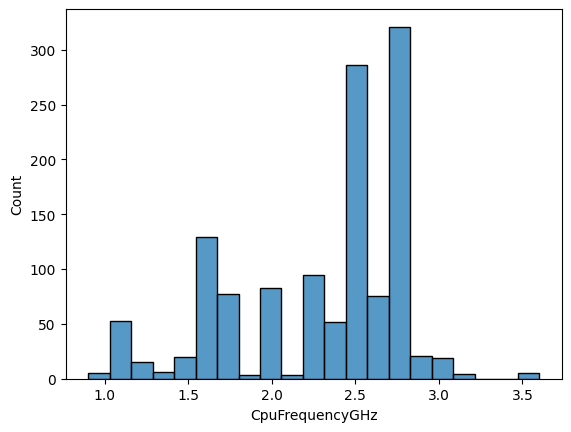

In [125]:
sns.histplot(df["CpuFrequencyGHz"])

Storage device

In [126]:
# Counting the number of occurrences of each unique value in the 'StorageDevice' column
df["StorageDevice"].value_counts()

StorageDevice
SSD              822
HDD              367
Flash Storage     72
Hybrid            10
Name: count, dtype: int64

In [127]:
# Getting the unique values in the 'StorageDevice' column
df["StorageDevice"].unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid', nan], dtype=object)

In [128]:
# Filling missing values (NaN) in the 'StorageDevice' column with the most frequent value (mode)
df["StorageDevice"]=df["StorageDevice"].fillna(df["StorageDevice"].mode()[0])

# Getting the unique values in the 'StorageDevice' column
df["StorageDevice"].unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

Price of Laptop

<Axes: xlabel='Price', ylabel='Count'>

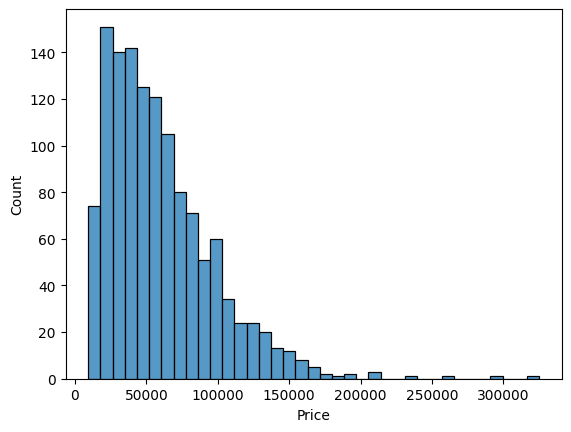

In [129]:
sns.histplot(df["Price"])

In [130]:
df["Price"].describe()

count      1272.000000
mean      59975.345751
std       37340.426973
min        9270.720000
25%       31914.720000
50%       52161.120000
75%       79346.840400
max      324954.720000
Name: Price, dtype: float64

In [131]:
q1=df.describe()["Price"]["25%"]
q3=df.describe()["Price"]["75%"]
IQR=q3-q1
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)
df["Price"]=df["Price"].clip(ll,ul)
df["Price"].describe()

count      1272.000000
mean      59182.323843
std       34357.460805
min        9270.720000
25%       31914.720000
50%       52161.120000
75%       79346.840400
max      150495.021000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

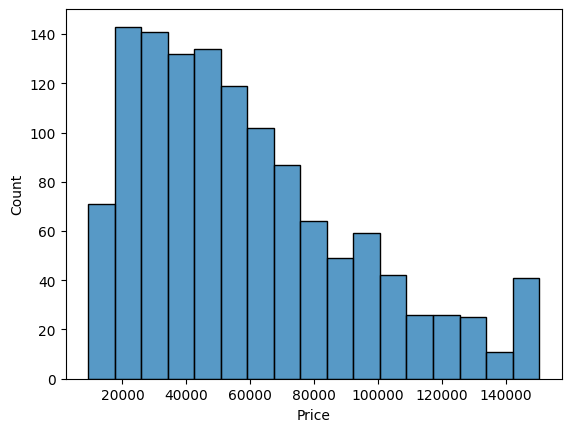

In [132]:
sns.histplot(df["Price"])

MEMORY

In [133]:
# Counting the number of occurrences of each unique value in the 'Memory' column
df["Memory"].value_counts()

Memory
256GB    496
1TB      233
128GB    173
512GB    138
500GB    130
32GB      43
64GB      16
2TB       16
1.0TB     10
16GB      10
180GB      4
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [134]:
# Standardizing and converting memory size values in the 'Memory' column to a consistent format in gigabytes (GB)
df["MemoryGB"]=df["Memory"].str.strip().replace("1.0TB","1TB").replace("1TB","1000GB").replace("2TB","2000GB").replace('508GB','500GB').replace('8GB','16GB').replace('240GB','256GB')

In [135]:
# Extracting numerical values from the 'MemoryGB' column using regex
df["Memory_GB"]=df["MemoryGB"].str.extract(r'(\d+)').astype(int)

# Counting the number of occurrences of each unique value in the 'Memory_GB' column
df["Memory_GB"].value_counts()

Memory_GB
256     497
1000    243
128     173
512     138
500     131
32       43
64       16
2000     16
16       11
180       4
Name: count, dtype: int64

correlaton matrix

In [136]:
correlaton_matrix=df.corr(numeric_only=True)
correlaton_matrix["Price"].sort_values(ascending=False)

Price              1.000000
RamGB              0.739397
Length             0.554982
Breadth            0.553734
PPI                0.502714
CpuFrequencyGHz    0.441527
Ips                0.267032
Touchscreen        0.195213
WeightKg           0.152779
Inches             0.028027
Memory_GB         -0.153866
Name: Price, dtype: float64

In [137]:
# Define a mapping dictionary to convert numerical values to categorical labels
d={0:"No",1:"Yes"}

# Apply the mapping to the 'Touchscreen' column
df["Touchscreen"] = df["Touchscreen"].map(d)

# Apply the mapping to the 'Ips' column
df["Ips"] = df["Ips"].map(d)

In [138]:
# Displaying the names of all columns in the DataFrame
df.columns

Index(['Company', 'Laptop_Type', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Pixels', 'Touchscreen',
       'Ips', 'Length', 'Breadth', 'PPI', 'Cpu_Processor', 'CpuFrequencyGHz',
       'GpuManufacturer', 'StorageDevice', 'CompanyName', 'WeightKg', 'RamGB',
       'MemoryGB', 'Memory_GB'],
      dtype='object')

In [139]:
# Displaying the first 5 rows of the DataFrame
df.head()

,Company,Laptop_Type,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,PPI,Cpu_Processor,CpuFrequencyGHz,GpuManufacturer,StorageDevice,CompanyName,WeightKg,RamGB,MemoryGB,Memory_GB
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB,Intel Iris Plus Graphics 640,Mac,1.37kg,...,202.365,Intel Core i5,2.3,Intel,SSD,Apple,1.37,8,128GB,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB,Intel HD Graphics 6000,Mac,1.34kg,...,127.680,Intel Core i5,1.8,Intel,Flash Storage,Apple,1.34,8,128GB,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB,Intel HD Graphics 620,Others/No OS/Linux,1.86kg,...,141.210,Intel Core i5,2.5,Intel,SSD,HP,1.86,8,256GB,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB,AMD Radeon Pro 455,Mac,1.83kg,...,202.365,Intel Core i7,2.7,AMD,SSD,Apple,1.83,14,512GB,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB,Intel Iris Plus Graphics 650,Mac,1.37kg,...,202.365,Intel Core i5,3.1,Intel,SSD,Apple,1.37,8,256GB,256


In [140]:
# Dropping the columns that are not necessary for the prediction model from the DataFrame
df.drop(columns=['Company','Memory', 'Inches', 'ScreenResolution', 'Cpu', 'Ram','Memory','Gpu', 'Weight', 'Pixels','Length', 'Breadth', 'PPI','WeightKg','MemoryGB'],axis=1,inplace=True)

In [141]:
df.head()

,Laptop_Type,OpSys,Price,Touchscreen,Ips,Cpu_Processor,CpuFrequencyGHz,GpuManufacturer,StorageDevice,CompanyName,RamGB,Memory_GB
0,Ultrabook,Mac,71378.6832,No,Yes,Intel Core i5,2.3,Intel,SSD,Apple,8,128
1,Ultrabook,Mac,47895.5232,No,No,Intel Core i5,1.8,Intel,Flash Storage,Apple,8,128
2,Notebook,Others/No OS/Linux,30636.0000,No,No,Intel Core i5,2.5,Intel,SSD,HP,8,256
3,Ultrabook,Mac,135195.3360,No,Yes,Intel Core i7,2.7,AMD,SSD,Apple,14,512
4,Ultrabook,Mac,96095.8080,No,Yes,Intel Core i5,3.1,Intel,SSD,Apple,8,256


In [142]:
correlaton_matrix=df.corr(numeric_only=True)
correlaton_matrix["Price"].sort_values(ascending=False)

Price              1.000000
RamGB              0.739397
CpuFrequencyGHz    0.441527
Memory_GB         -0.153866
Name: Price, dtype: float64

In [143]:
# Displaying a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Laptop_Type      1272 non-null   object 
 1   OpSys            1272 non-null   object 
 2   Price            1272 non-null   float64
 3   Touchscreen      1272 non-null   object 
 4   Ips              1272 non-null   object 
 5   Cpu_Processor    1272 non-null   object 
 6   CpuFrequencyGHz  1272 non-null   float64
 7   GpuManufacturer  1272 non-null   object 
 8   StorageDevice    1272 non-null   object 
 9   CompanyName      1272 non-null   object 
 10  RamGB            1272 non-null   int64  
 11  Memory_GB        1272 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 129.2+ KB


<Axes: xlabel='Ips', ylabel='Price'>

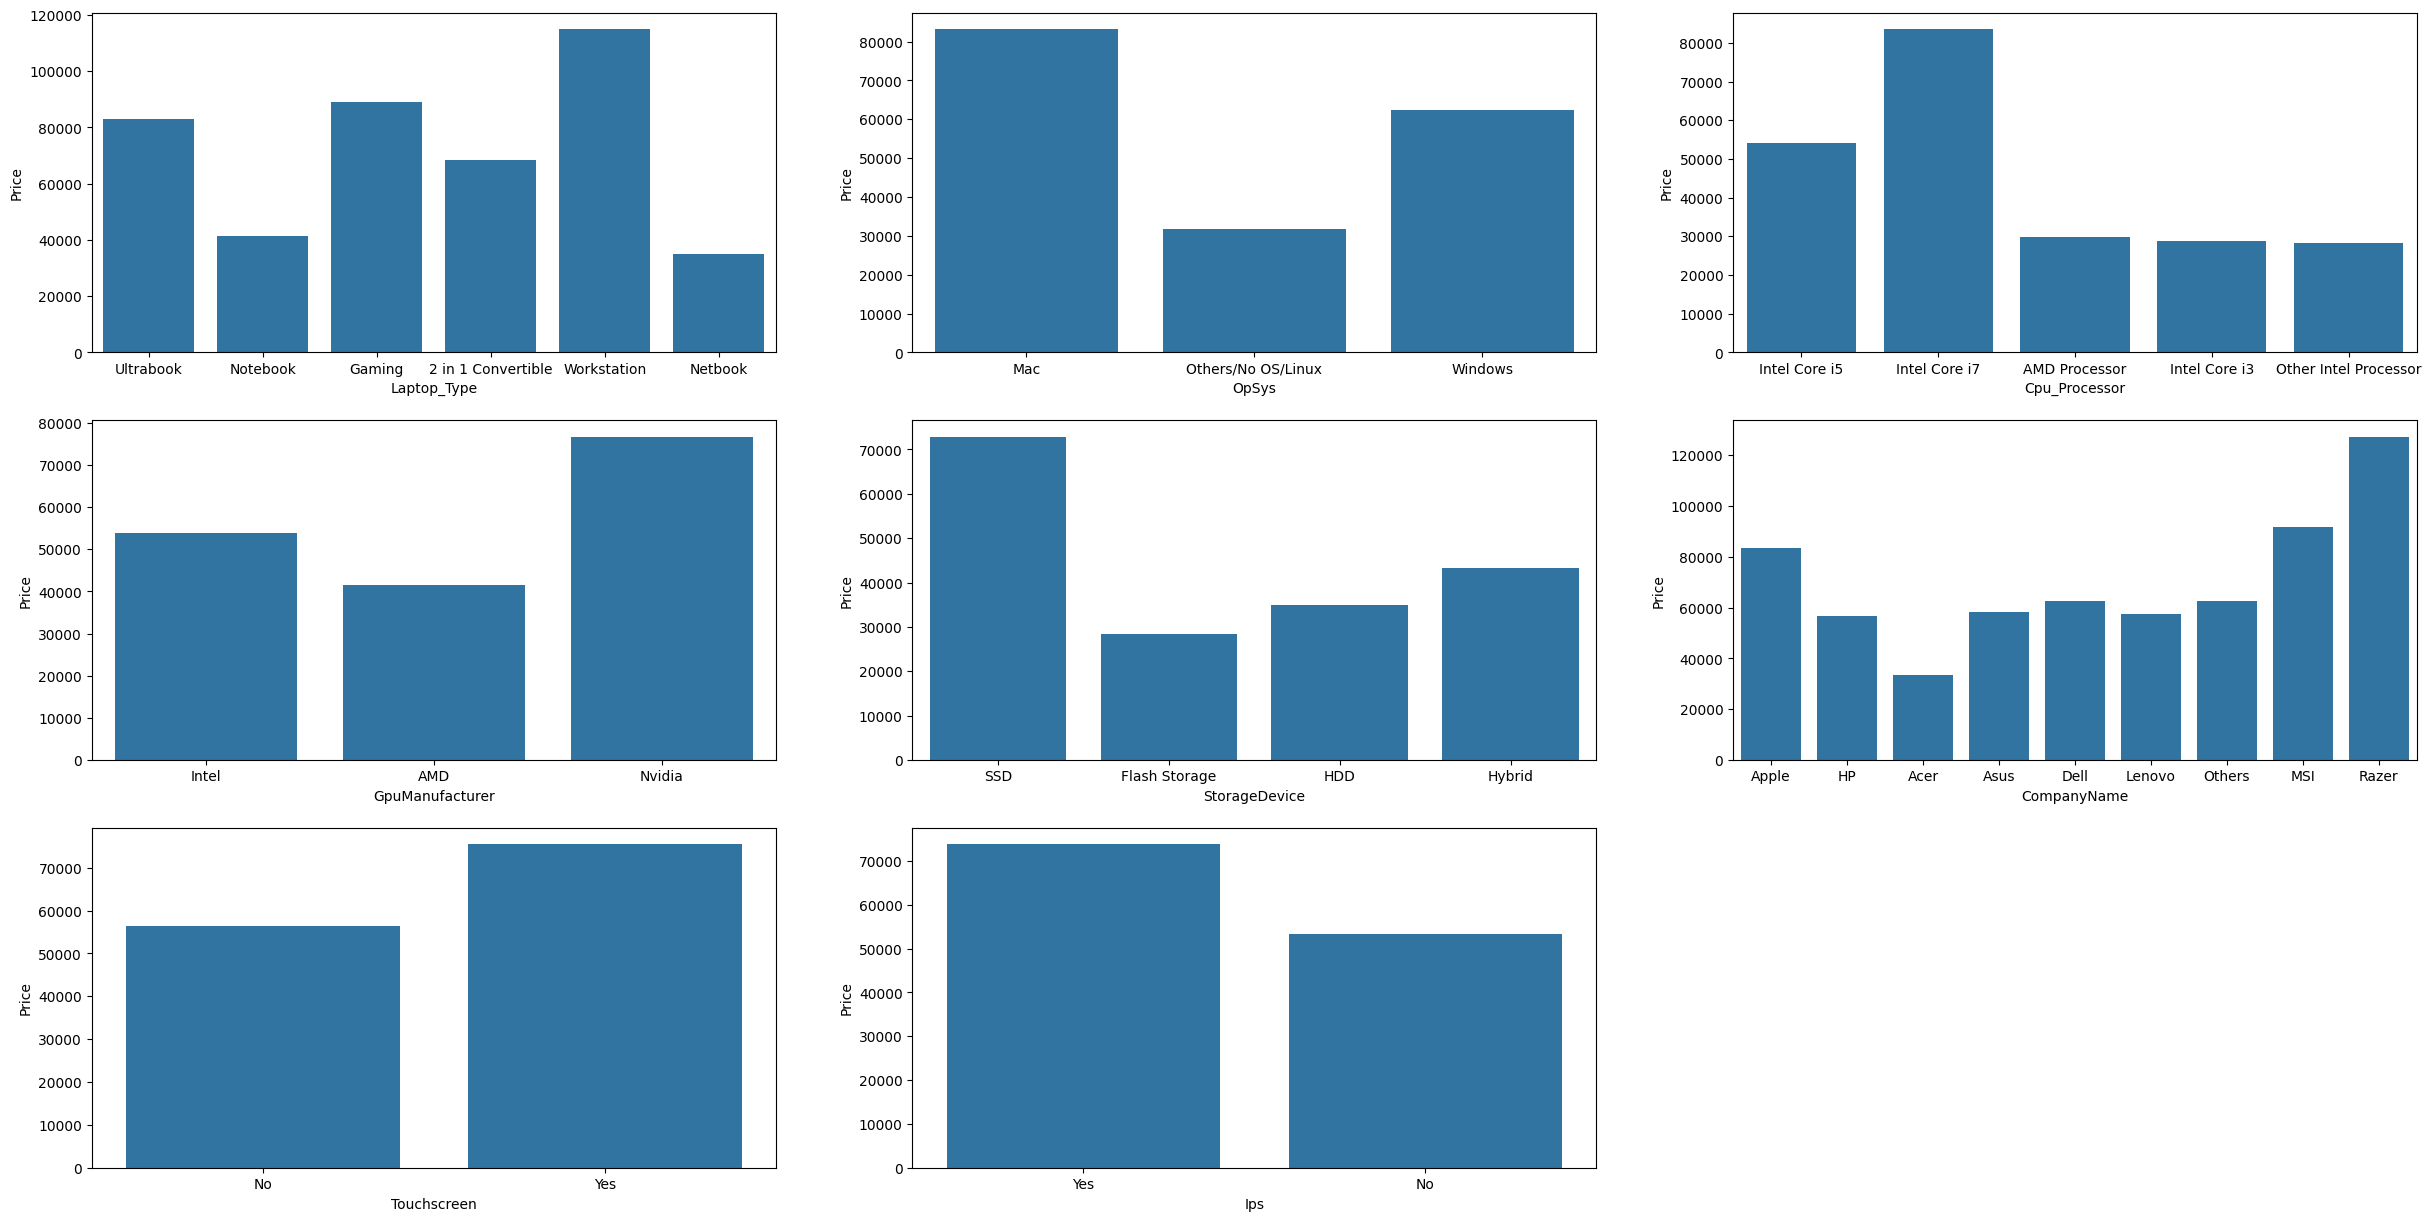

In [144]:
plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.barplot(df,x="Laptop_Type",y="Price",errorbar=None)
plt.subplot(3,3,2)
sns.barplot(df,x="OpSys",y="Price",errorbar=None)
plt.subplot(3,3,3)
sns.barplot(df,x="Cpu_Processor",y="Price",errorbar=None)
plt.subplot(3,3,4)
sns.barplot(df,x="GpuManufacturer",y="Price",errorbar=None)
plt.subplot(3,3,5)
sns.barplot(df,x="StorageDevice",y="Price",errorbar=None)
plt.subplot(3,3,6)
sns.barplot(df,x="CompanyName",y="Price",errorbar=None)
plt.subplot(3,3,7)
sns.barplot(df,x="Touchscreen",y="Price",errorbar=None)
plt.subplot(3,3,8)
sns.barplot(df,x="Ips",y="Price",errorbar=None)


<Axes: xlabel='Memory_GB', ylabel='Price'>

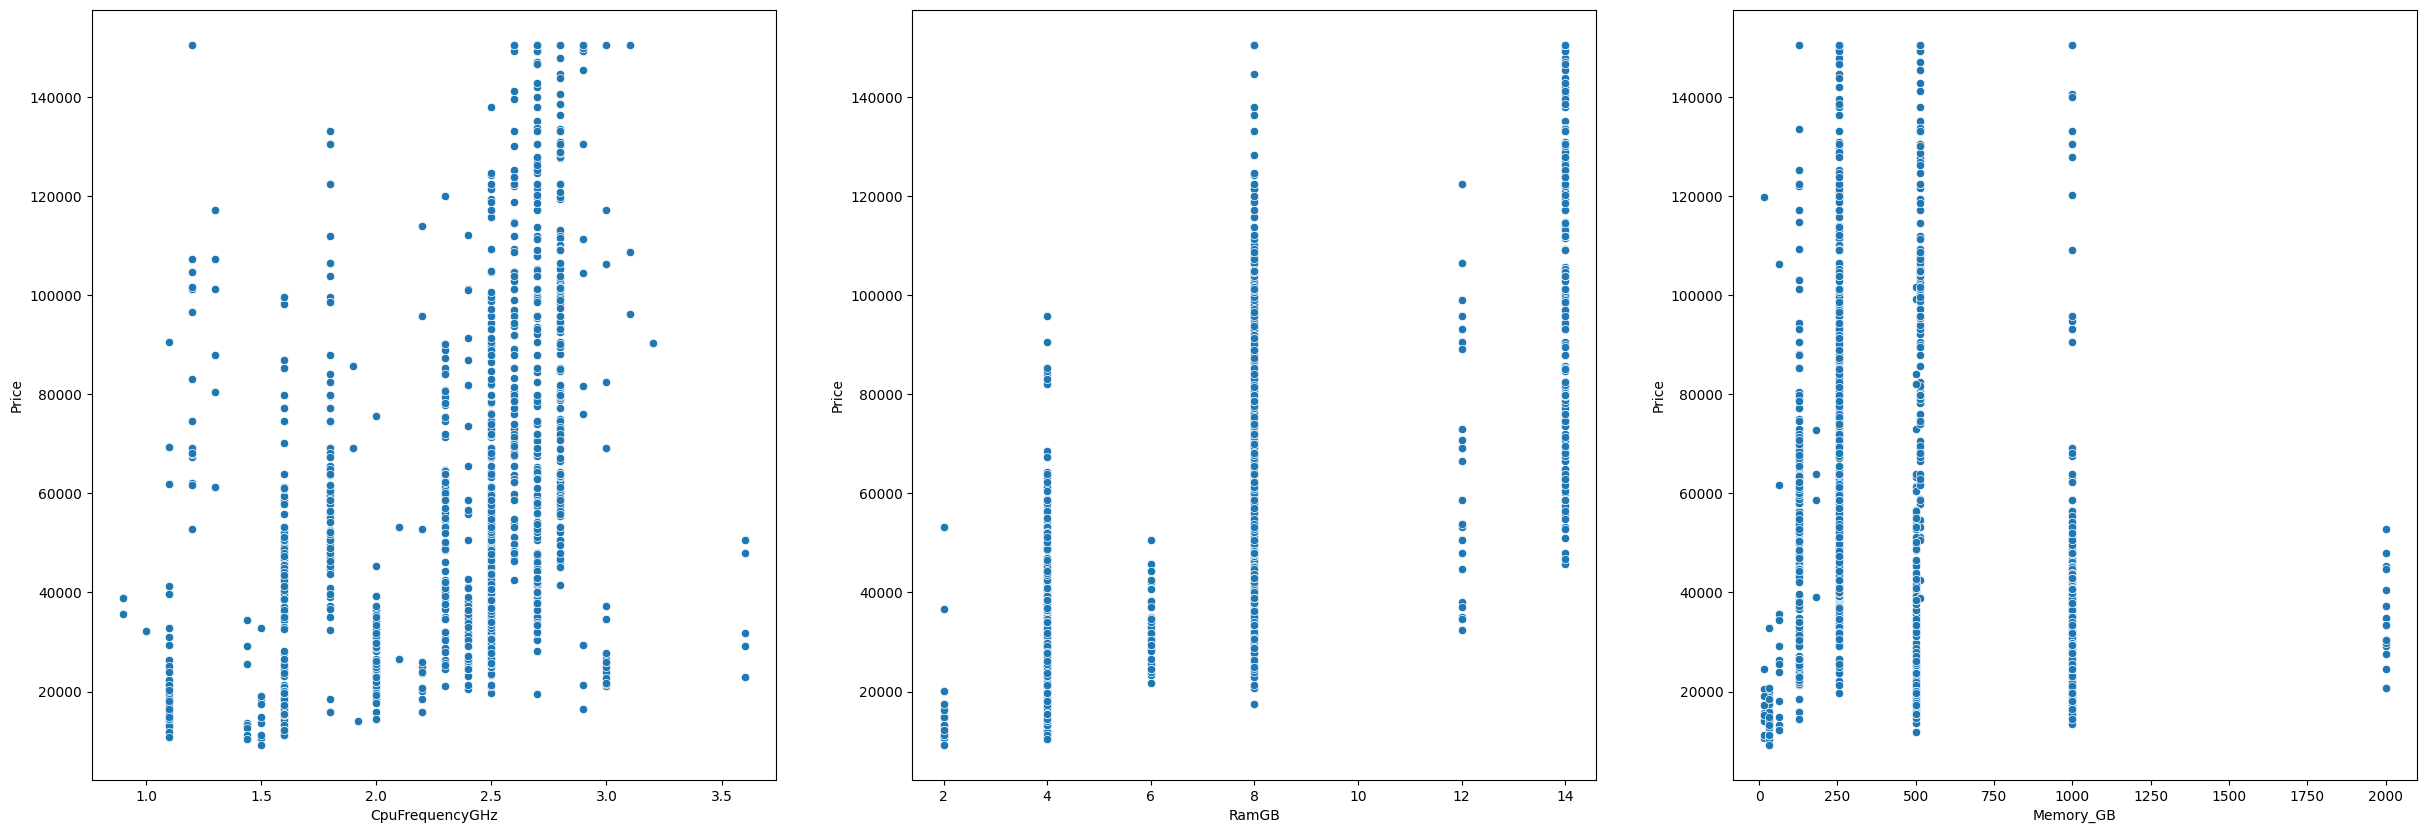

In [145]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.scatterplot(df,x="CpuFrequencyGHz",y="Price")
plt.subplot(1,3,2)
sns.scatterplot(df,x="RamGB",y="Price")
plt.subplot(1,3,3)
sns.scatterplot(df,x="Memory_GB",y="Price")

In [146]:
# Splitting the data into independent variables (X) and dependent variable (y)
X = df.drop(columns='Price')

# Displaying the first 5 rows of the 'X' variable
X.columns

Index(['Laptop_Type', 'OpSys', 'Touchscreen', 'Ips', 'Cpu_Processor',
       'CpuFrequencyGHz', 'GpuManufacturer', 'StorageDevice', 'CompanyName',
       'RamGB', 'Memory_GB'],
      dtype='object')

In [147]:
# Selecting the 'Price' column from the DataFrame and assigning it to the variable 'y'
y = df["Price"]

# Displaying the first 5 rows of the 'y' variable
y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [148]:
# Importing SimpleImputer for handling missing values in the dataset
from sklearn.impute import SimpleImputer

# Importing Pipeline to create a sequence of data processing and modeling steps
from sklearn.pipeline import Pipeline

# Importing make_pipeline to create a pipeline more conveniently
from sklearn.pipeline import make_pipeline

In [149]:
# Importing OneHotEncoder to convert categorical variables into a one-hot numeric array
from sklearn.preprocessing import OneHotEncoder

categorical_processor=Pipeline(
steps=[
("imputation_constant",SimpleImputer(fill_value="missing",strategy="most_frequent")),
("OneHotEncoder",OneHotEncoder(handle_unknown="ignore"))
])
categorical_processor

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='most_frequent')),
                ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'))])

In [150]:
# Importing StandardScaler for standardizing features
from sklearn.preprocessing import StandardScaler

numeric_processor=Pipeline(
steps=[
("imputation",SimpleImputer()),
("StandardScaler",StandardScaler())
])
numeric_processor

Pipeline(steps=[('imputation', SimpleImputer()),
                ('StandardScaler', StandardScaler())])

In [151]:
# Selecting columns with categorical data (object dtype) from the DataFrame X
categorical_columns = X.select_dtypes(include='object')

# Retrieving the column names of the selected categorical columns
categorical_columns.columns

Index(['Laptop_Type', 'OpSys', 'Touchscreen', 'Ips', 'Cpu_Processor',
       'GpuManufacturer', 'StorageDevice', 'CompanyName'],
      dtype='object')

In [152]:
# Selecting columns with numerical data (excluding object dtype) from the DataFrame Xnumerical_columns = X.select_dtypes(exclude='object')
numerical_columns = X.select_dtypes(exclude='object')

# Retrieving the column names of the selected numerical columns
numerical_columns.columns

Index(['CpuFrequencyGHz', 'RamGB', 'Memory_GB'], dtype='object')

In [153]:
# Importing ColumnTransformer to apply different preprocessing steps to different subsets of columns
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
    transformers=[
        ("categorical",categorical_processor,categorical_columns.columns),
        ("numeric",numeric_processor,numerical_columns.columns)],remainder='passthrough')

# Displaying the preprocessor object to verify its configuration
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Laptop_Type', 'OpSys', 'Touchscreen', 'Ips', 'Cpu_Processor',
       'GpuManufacturer', 'StorageDevice', 'CompanyName'],
      dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer()),
                                                 ('StandardScaler',
                                                  StandardScaler())]),
                                 Index(['CpuFrequencyGHz', 'RamGB', 'Memory_GB'], dtype='object'))])

In [154]:
# Importing train_test_split to divide the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Splitting the data for training and testing the model
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [155]:
%%capture
!pip install xgboost

In [156]:
# Importing various regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Creating a pipeline that combines preprocessing and the respective regressor
final=make_pipeline(preprocessor,RandomForestRegressor())

# Displaying the pipeline object to verify its configuration
final


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Laptop_Type', 'OpSys', 'Touchscreen', 'Ips', 'Cpu_Processor',
       'GpuManufacturer', 'StorageDevice', 'CompanyName'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('StandardScaler',
                                                                   StandardScaler())]),
                                                  Index(['CpuFrequencyGHz', 'RamGB', 'Memory_GB'], dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [157]:
# Fitting the pipeline to the training data
final.fit(x_train,y_train)

#Predict on the test data
y_pred = final.predict(x_test)

#Calculate MSE and RMSE
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE ** 0.5

# Print RMSE
print("RMSE:", RMSE)

RMSE: 14987.458542368366


Root Mean Square Error for the model:
XGBRegressor = 15410,
RandomForestRegressor = 14862,
LinearRegression = 17711,
KNeighborsRegressor  =17844,
DecisionTreeRegressor = 19393,
SVR = 34397.

In [ ]:
# creating Gradio Application
%%capture
!pip install gradio

In [ ]:
# Displaying the column names of the DataFrame X
X.columns

In [ ]:
# Importing Gradio library for creating a web-based interface for model predictions
import gradio as gr

# Defining a function to make predictions on laptop prices based on user inputs
def prediction_Price(Laptop_Type, OpSys,Touchscreen, Ips, Cpu_Processor,
       CpuFrequencyGHz, GpuManufacturer, StorageDevice, CompanyName,
       RamGB, Memory_GB):
      # Creating a DataFrame from the input parameters
  inputs=pd.DataFrame([[Laptop_Type, OpSys,Touchscreen, Ips, Cpu_Processor,
       CpuFrequencyGHz, GpuManufacturer, StorageDevice, CompanyName,
       RamGB, Memory_GB]],columns=['Laptop_Type', 'OpSys', 'Touchscreen', 'Ips',
                                   'Cpu_Processor','CpuFrequencyGHz', 'GpuManufacturer',
                                   'StorageDevice', 'CompanyName','RamGB', 'Memory_GB'])

 # Using the trained pipeline 'final' to make a prediction based on the input DataFrame
  return final.predict(inputs)[0]


In [ ]:
# Displaying the first 5 rows of the 'y_test' Series
y_test.head()

In [ ]:
# Displaying the first 5 rows of the 'x_test' Series
x_test.head(5)

In [ ]:
# Creating a Gradio Dropdown or Number component for the features of dataframe

Laptop_Type = gr.Dropdown(label="Laptop Type", choices=['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible', 'Workstation', 'Netbook'])
OpSys = gr.Dropdown(label="OpSys", choices=['mac',  'Windows', 'Others/No OS/Linux'])
Touchscreen= gr.Dropdown(label="Touchscreen", choices=['Yes', 'No'])
Ips = gr.Dropdown(label="Ips", choices=['Yes', 'No'])
Cpu_Processor = gr.Dropdown(label="Cpu Processor", choices=['Intel Core i3','Intel Core i5', 'Intel Core i7', 'AMD Processor','Other Intel Processor'])
CpuFrequencyGHz = gr.Number(label="Cpu Frequency(Between 0.0 to 3.5)GHz")
GpuManufacturer = gr.Dropdown(label="Gpu Manufacturer", choices=['Intel', 'AMD', 'Nvidia'])
StorageDevice = gr.Dropdown(label="Storage Device", choices=['SSD', 'Flash Storage', 'HDD', 'Hybrid'])
CompanyName = gr.Dropdown(label="Company", choices=['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'MSI','Razer', 'Others'])
RamGB = gr.Dropdown(label="Ram(GB)",choices=[ 2, 4,  6,  8, 12, 14])
Memory_GB = gr.Dropdown(label="Memory(GB)",choices=[ 16, 32, 64, 128,180, 256,500, 512, 1000,2000])

# Creating a list of input components for the Gradio interface
inputs = [Laptop_Type, OpSys,Touchscreen, Ips, Cpu_Processor,
       CpuFrequencyGHz, GpuManufacturer, StorageDevice, CompanyName,
       RamGB, Memory_GB]

# Creating an output component for the Gradio interface to display the predicted price
outputs = gr.Number(label="Prediction Price")

# Creating a Gradio interface for the laptop price prediction model
app = gr.Interface(fn=prediction_Price, inputs=inputs, outputs=outputs, title="Prediction Price of a Laptop")

# Launching the Gradio interface
app.launch(debug=True)
